In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy.signal import find_peaks
try: import sounddevice as sd
except: print('Biblioteca sounddevice não encontrada, os sons não serão tocados')
pickle_file=open('Analise_fourier.pickle','rb')
sounds=pickle.load(pickle_file)
pickle_file.close()

# Filtragem
Neste notebook vamos explorar um pouco o que é um filtro e como podemos utilizar ele para modificar um sinal. um filtro é um dispositivo que tem a capacidade de remover ou atenuar uma parte do espectro de um sinal. Tradicionalmente os filtros são empregados para remover uma banda específica do sinal que traz uma componente de frequência indesejada. 
Existem diversas formas de se connstruir um filtro de forma a atender as mais diferente necessidades de processamento de sinais. O propósito dessa implementação será tratar um dos sinais de áudio construídos no notebok de análise de Fourier.

## O filtro Butterwoth passa-baixas
Uma das implementações mais tradicionais de filtros é o filtro Butterworth. Este filtro é desenvolvido para que ele atenue frequências fora da sua banda de atuação (no caso do passa-baixas, frequências maiores que a frequencia de corte $\omega_c$) e apresente uma resposta uniforme a frequências dentro da banda de atuação, diminuindo distorções no sinal desejado.
Este filtro é muito utilizado justamente porque sua implementação física é extremamente simples, utilizando apenas resistores e capacitores.
 

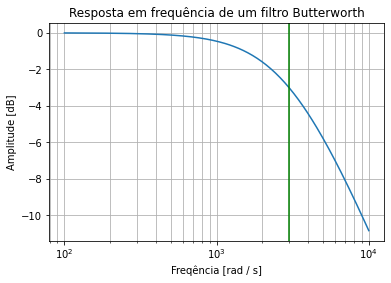

In [18]:
b, a = signal.butter(1, 3000, 'low', analog=True)
w, h = signal.freqs(b, a)
plt.plot(w, 20 * np.log10(abs(h)));
plt.xscale('log')
plt.title('Resposta em frequência de um filtro Butterworth')
plt.xlabel('Freqência [rad / s]')
plt.ylabel('Amplitude [dB]')
plt.grid(which='both', axis='both')
plt.axvline(3000, color='green');

A linha Verde corresponde à frequência de corte do filtro, que é a frequência onde sua resposta corresponde a -3 dB, ou seja, metade da potência de um sinal com essa freqência é absorvida pelo filtro.

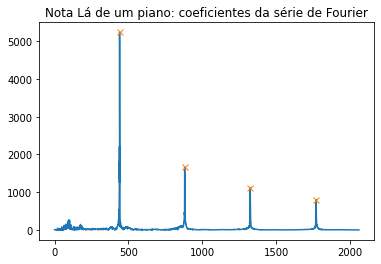

In [19]:
piano_data=np.array(sounds[1])
piano_data=piano_data[:,0]
fs=sounds[5]
try: sd.play(piano_data,fs)
except: pass
piano_fft=np.fft.fft(piano_data)
x=np.linspace(0,44100/2,len(piano_fft)//2)
y=np.abs(piano_fft[:len(piano_fft)//2])
plt.plot(x[:10000],y[:10000])
p=signal.find_peaks(y[:10000],height=400,distance=100)
p=p[0]
plt.title('Nota Lá de um piano: coeficientes da série de Fourier')
plt.plot(x[p],y[p],'x');

In [25]:
print(piano_data)
piano_filtrado=signal.filtfilt(b,a,piano_data)
piano_filtrado

[0. 0. 0. ... 0. 0. 0.]


array([nan, nan, nan, ..., nan, nan, nan])